In [11]:
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath("."))
sys.path.append(os.path.dirname(SCRIPT_DIR))

from src import results
import importlib
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from src.plotting import plot_fill_between_mean_std,plot_fill_between_min_max
from src.plotting import plot_matrix_fill_between_mean_min_max,plot_matrix_fill_between_mean_std

Valores iniciais: 
- T_MIN=0.1
- T_MAX=6
- N_ANTS = 30
- N_ITS = 100
- EVAP_R=0.1

In [12]:
folders = list(pathlib.Path("../../results/p_hat700/").glob("*_alpha"))

In [13]:
results_agg_per_run = dict()
for folder in folders:
    folder_name = str(folder).split("/")[-1]
    files_of_folder = list(folder.glob("*.csv"))
    results_agg = results.ResultsAgg()
    results_agg.agg_files(files_of_folder, delimiter=",")
    results_agg_per_run[folder_name] = results_agg

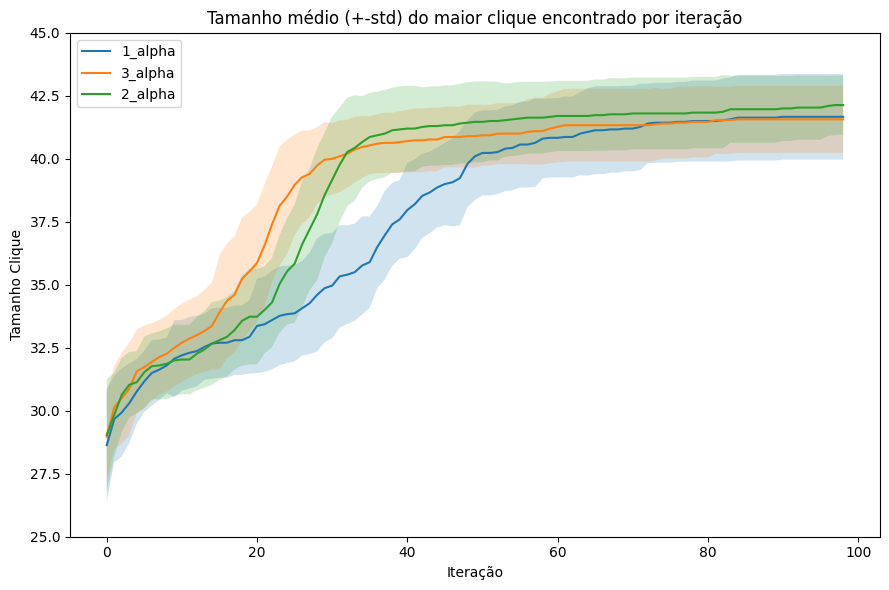

In [14]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    # plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    plot_matrix_fill_between_mean_std(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (+-std) do maior clique encontrado por iteração")
plt.ylim((25, 45))
plt.savefig("./assets/p_hat_5_cliques_std.png")
fig.tight_layout()

Pelo gráfico acima, pode-se perceber que usando alpha = 3, nas primeiras iterações, o algoritmo parece ter um início melhor. Entretanto, a medida em que as iterações passam, usar alpha=1 ou 2 passa a ser melhor. Na verdade, esses últimos parecem ter resultados equivalentes.

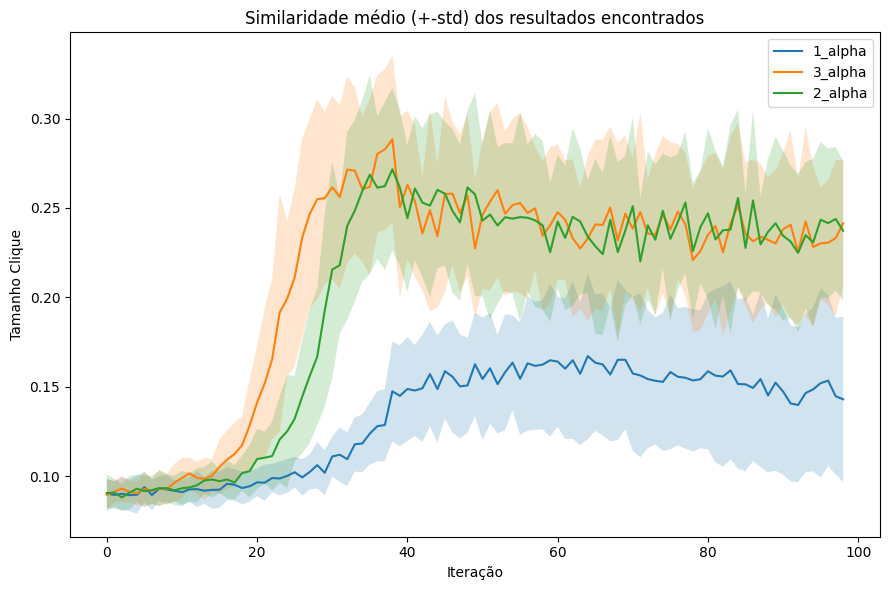

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    # plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    plot_matrix_fill_between_mean_std(list(results_agg.per_it_similarity.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Similaridade médio (+-std) dos resultados encontrados")
plt.savefig("./assets/p_hat_5_sims_std.png")
fig.tight_layout()

Por esse gráfico, é possíve notas que utilizar de alpha igual a 1 controla a similaridade das soluções de forma melhor do que alpha=1 ou 2. Isso é bom pois, mesmo tendendo a haver mais exploitation nas iterações finais, essas soluções não são extremamente parecidas, cerca de 16% delas são semelhantes.